In [121]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from time import perf_counter

In [122]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [123]:
print(device)

cuda:0


In [124]:
net = nn.Sequential(
    nn.Linear(20, 100),
    nn.ReLU(),
    nn.Linear(100, 500),
    nn.ReLU(),
    nn.Linear(500, 30),
    nn.Linear(30, 2)
)

In [125]:
net

Sequential(
  (0): Linear(in_features=20, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=500, bias=True)
  (3): ReLU()
  (4): Linear(in_features=500, out_features=30, bias=True)
  (5): Linear(in_features=30, out_features=2, bias=True)
)

In [126]:
torch.cuda.is_available()

True

In [127]:
# Random data
data = torch.randn((1000, 20)).float()
labels = torch.randint(low=0, high=2, size=(1, 1000))
# labels = torch.randint(low=0, high=2, size=(1, 1000), device=device)

In [128]:
data.device, labels.device

(device(type='cpu'), device(type='cpu'))

In [135]:
start_time = perf_counter()
output = net(data)
end_time = perf_counter()
print(f"Test Time(cpu): {(end_time-start_time)*1000:.4f} ms")

Test Time(cpu): 1.3212 ms


In [130]:
# Sending data to gpu
net.to(device=device)
data = data.to(device=device)
labels = labels.to(device=device)

In [131]:
data.device, labels.device

(device(type='cuda', index=0), device(type='cuda', index=0))

In [138]:
start_time = perf_counter()
output = net(data)
end_time = perf_counter()
print(f"Test Time(gpu): {(end_time-start_time)*1000:.4f} ms")

Test Time(gpu): 0.5447 ms


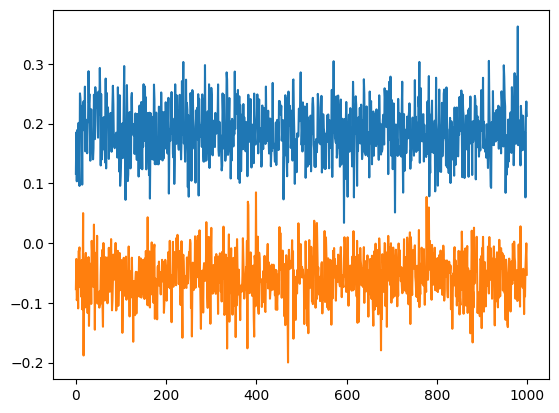

In [133]:
plt.plot(output.detach().cpu())